## 1-minute introduction to Jupyter ##

A Jupyter notebook consists of cells. Each cell contains either text or code.

A text cell will not have any text to the left of the cell. A code cell has `In [ ]:` to the left of the cell.

If the cell contains code, you can edit it. Press <kbd>Enter</kbd> to edit the selected cell. While editing the code, press <kbd>Enter</kbd> to create a new line, or <kbd>Shift</kbd>+<kbd>Enter</kbd> to run the code. If you are not editing the code, select a cell and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd> to run the code.

On a tablet, use the ▶️ button to run the code.

# Lesson 7c: Python data types: `set` (optional)

A set is a special type of collection: every element in a set is unique!

Let's see how to define a `set`.

In [ ]:
# Method 1
studentset = {'Alice', '2001', 'Bobby', '2001', 'Charlie', '2002'}
studentset

A `set` is constructed using `{`curly brace`}` notation. This makes it easily confused for a `dict`.

But a `set` does not have `key: value` pairs separated by a colon (`:`), it only has a set of elements separated by a comma (`,`).

Notice that `'2001'` was repeated twice in the definition of `studentset`, but only appears once? That's because a `set` can contain unique values only.

How do we initialise an empty set?

In [ ]:
print('Let\'s try to initialise an empty set.')
empty_set = {}
print(f'type: {type(empty_set)}')
print('Oops!')
print('')
print('Since we can\'t use empty {curly braces} to define an empty set, we can only use set()')
empty_set = set()
print(f'type: {type(empty_set)}')

## Converting other collection types to `set`s

Other collection types can be converted to `set`s:

In [ ]:
a_list = [1, 2, 3]
list_converted = set(a_list)
print('A list converted to a set:', list_converted)

print('')
a_dict = {'a': 1, 'b': 2, 'c': 3}
dict_converted = set(a_dict)
print('A dict converted to a set:', dict_converted)
print('(Notice that only keys are converted; values are left out.)')

print('')
a_tuple = (1, 2, 3)
tuple_converted = set(a_tuple)
print(f'A tuple converted to a set: {tuple_converted}')

A common way to eliminate duplicates in a `list` is to convert it to a `set`, then convert it back to a `list` again:

In [ ]:
duplicate_list = [1, 2, 2, 3, 4, 5, 6, 6, 6, 7, 7, 8, 9]
unduplicated_list = list(set(duplicate_list))
print(unduplicated_list)

## `set`s are unordered

One unique feature of `set`s is that the order of their elements is **not guaranteed**. Any function, method, or operation that requires `set` elements to be in a certain order will not be able to return a `set`. Python generally tries to return sensible results.

For instance:

In [ ]:
unduplicated_set = set(unduplicated_list)
print(unduplicated_set[0:3])

Slicing does not work on sets, since the order of elements is not guaranteed.

The `reverse()` method does not work either:

In [ ]:
unduplicated_set.reverse()

In [ ]:
print(sorted(unduplicated_set))
print(
    'Python can also sort a set with the sorted() function,'
    'but it returns a list instead of a set.'
)

## `set`s cannot contain mutable collections

In [ ]:
a, b, c = [1, 2, 3], [4, 5, 6], [7, 8, 9]
collection_set = {a, b, c}

The unique feature of sets is that they are not supposed to have identical elements. We cannot guarantee this if a set contains mutable collections.

Suppose we try to create a set as follows:

```python
a, b, c = [1, 2, 3], [4, 5, 6], [7, 8, 9]
collection_set = {a, b, c}
```
    
If we later change one of the lists:

    b = [1, 2, 3]
    
That would violate the uniqueness condition of a set (since `a == b`). Therefore, a set can only contain immutable elements (`int`, `float`, `str`, `bool`, etc).

## Other `set` features

Review Lesson 4 on `list`s again. `list`s have many methods, functions, and operators associated with them: 

- indexing
- slicing
- collection editing methods
- collection comparators
- collection operators
- `in` membership operator
- `min()`, `max()`, `sorted()`, `sum()` functions
- `count()` and `reverse()` methods
- Iterating over collections

Which of those features work with `set`s? Which features do not work with `set`s?

In [ ]:
# Try your code here

## So what are sets good for?

Since sets contain only unique elements, two or more sets can be operated on using mathematical set operations:

- `intersection`
- `symmetric_difference` (labelled as `symmetricDifference` in the diagram)
- `union`
- `difference` (labelled as `subtracting` in the diagram)

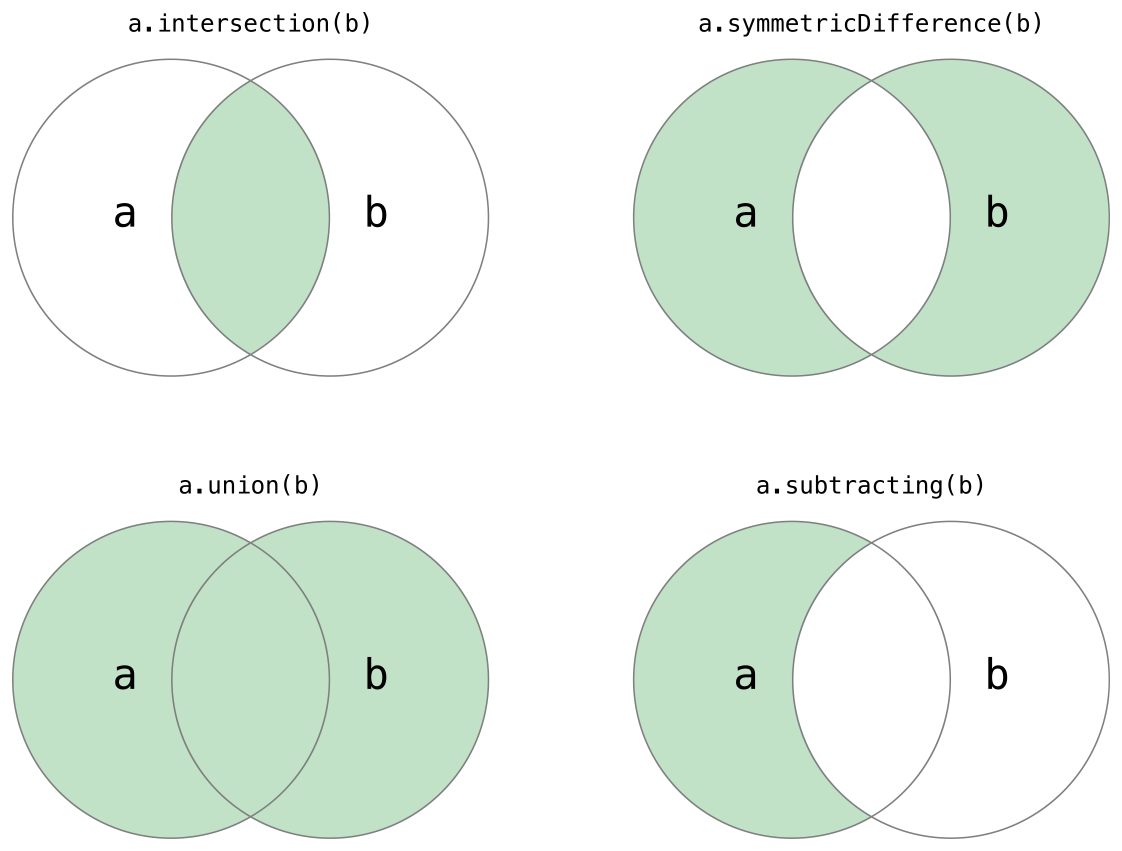

In [ ]:
# this is a sneak preview of the data in studentsubjects.csv
with open('studentsubjects.csv') as f:
    print(f.readlines())

## Exercise 1: Storing data in a set

Write a function `read_subj(filename)` to read in student data from `filename` and store it in a `dict` with keys `'name'` and `'subjects'`.

In [ ]:
def read_subj(filename):
    # write your code here
    pass
    
filename = 'studentsubjects.csv'
data = read_subj(filename)
data

## Mathematical set operations

Let's see how we can use mathematical set operations to get useful data out of this information.

### Union

If all this data was stored as a list, how much code would you have to write to find out all the subjects taken by these 5 students?

With sets, it's just 3 lines of code:

In [ ]:
all_subjs = set()
for student in data:
    # union() returns a new set containing elements from both sets
    all_subjs = all_subjs.union(student['subjects'])
print(all_subjs)

### Intersection

How do we find out the subjects that **all** 5 students take?

In [ ]:
common_subjs = set()
for student in data:
    if len(common_subjs) == 0:
        # we cannot start intersecting with an empty set since that will return an empty set
        common_subjs = student['subjects']
    else:
        # intersection() returns a new set containing only elements found in both sets
        common_subjs = common_subjs.intersection(student['subjects'])
print(common_subjs)

### Symmetric difference

What about subjects that **not all** 5 students take?

In [ ]:
uncommon_subjs = set()
for student in data:
    if len(uncommon_subjs) == 0:
        # we cannot start intersecting with an empty set since that will return an empty set
        uncommon_subjs = student['subjects']
    else:
        # symetric difference() returns a new set containing only elements found
        # **only in either set** but not both
        uncommon_subjs = common_subjs.symmetric_difference(student['subjects'])
print(uncommon_subjs)

### Difference

How do we find out which uncommon subjects **Bobby** takes?

We could take the intersection of Bobby's subjects with the uncommon subjects.

We could also take the **difference** of Bobby's subjects and the common subjects:

In [ ]:
# Let's define a helper function to help us find the index of a student in the data
def index_of_name(name,data):
    for i, student in enumerate(data):
        if student['name'] == name:
            return i

b_index = index_of_name('Bobby',data)
bobby_subjs = data[b_index]['subjects']
bobby_uncommon_subjs = bobby_subjs.difference(common_subjs)
print(bobby_uncommon_subjs)

## set operators

In place of the methods, you can also use the following set operators:

- `s.union(t)` is equivalent to `s | t`
- `s.intersection(t)` is equivalent to `s & t`
- `s.symmetric_difference(t)` is equivalent to `s ^ t`
- `s.difference(t)` is equivalent to `s - t`

In [ ]:
# Using | in place of union()
all_subjs = set()
for student in data:
    # union() returns a new set containing elements from both sets
    all_subjs = all_subjs | student['subjects']
print(all_subjs)

In [ ]:
# Using & in place of intersection()
common_subjs = set()
for student in data:
    if len(common_subjs) == 0:
        # we cannot start intersecting with an empty set since that will return an empty set
        common_subjs = student['subjects']
    else:
        # intersection() returns a new set containing only elements found in both sets
        common_subjs = common_subjs & student['subjects']
print(common_subjs)

In [ ]:
# Using ^ in place of symmetric_difference()
uncommon_subjs = set()
for student in data:
    if len(uncommon_subjs) == 0:
        # we cannot start intersecting with an empty set since that will return an empty set
        uncommon_subjs = student['subjects']
    else:
        # symetric_difference() returns a new set containing only elements found
        # **only in either set** but not both
        uncommon_subjs = common_subjs ^ student['subjects']
print(uncommon_subjs)

In [ ]:
# Let's define a helper function to help us find the index of a student in the data
def index_of_name(name,data):
    for i, student in enumerate(data):
        if student['name'] == name:
            return i

# Using - in place of difference()
b_index = index_of_name('Bobby',data)
bobby_subjs = data[b_index]['subjects']
bobby_uncommon_subjs = bobby_subjs - common_subjs
print(bobby_uncommon_subjs)

## `set` boolean methods

`set`s have methods that can check if two `set`s are related as subsets, supersets, or disjoint.

Run each of the following lines of code one by one and explain the result:

1. `all_subjs.issuperset(uncommon_subjs)`
2. `common_subjs.issubset(all_subjs)`
3. `bobby_uncommon_subjs.isdisjoint(all_subjs)`
4. `common_subjs.isdisjoint(uncommon_subjs)`

In [ ]:
# Try your code here

Question: What does the term "disjoint" mean?